In [1]:
pip install yfinance

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as si
import os

In [3]:
data = yf.download("AAPL", start="2020-03-01", end="2021-03-01")

[*********************100%***********************]  1 of 1 completed


In [4]:
data = pd.DataFrame(data = data['Adj Close'])

In [5]:
data

,Adj Close
Date,
2020-03-02,74.127892
2020-03-03,71.773636
2020-03-04,75.102829
2020-03-05,72.666725
2020-03-06,71.701706
...,...
2021-02-22,126.000000
2021-02-23,125.860001
2021-02-24,125.349998


array([<AxesSubplot:xlabel='Date'>], dtype=object)

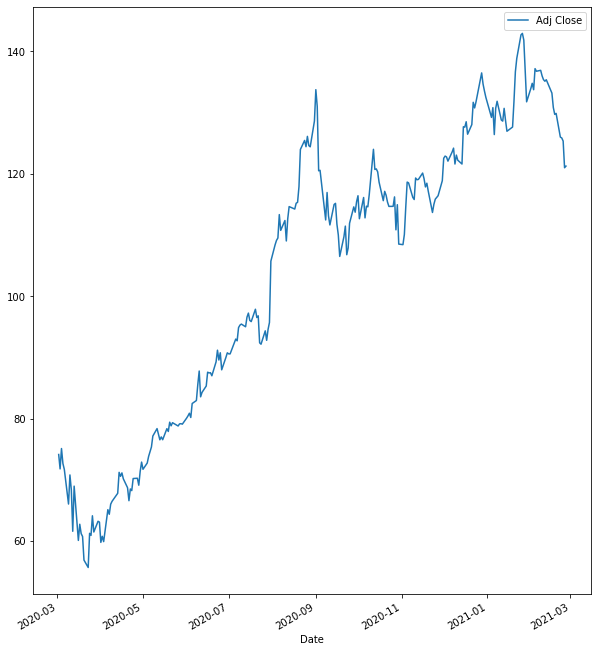

In [6]:
data.plot(figsize=(10, 12), subplots=True)

In [7]:
data['returns'] = (data['Adj Close'] /data['Adj Close'].shift(1)) - 1

In [8]:
print(data)

             Adj Close   returns
Date                            
2020-03-02   74.127892       NaN
2020-03-03   71.773636 -0.031759
2020-03-04   75.102829  0.046385
2020-03-05   72.666725 -0.032437
2020-03-06   71.701706 -0.013280
...                ...       ...
2021-02-22  126.000000 -0.029799
2021-02-23  125.860001 -0.001111
2021-02-24  125.349998 -0.004052
2021-02-25  120.989998 -0.034783
2021-02-26  121.260002  0.002232

[251 rows x 2 columns]


In [9]:
#12 Month Daily Volatility
daily_std =np.std(data.returns)
daily_std

0.02871718529531506

In [10]:
#12 Month Annualised volatility
std = daily_std * np.sqrt(252)
std

0.45587118387098763

In [11]:
data = yf.download("AAPL", start="2020-03-01", end="2021-09-01")

[*********************100%***********************]  1 of 1 completed


In [12]:
data = pd.DataFrame(data = data['Adj Close'])

In [13]:
print(data)

             Adj Close
Date                  
2020-03-02   74.127892
2020-03-03   71.773636
2020-03-04   75.102829
2020-03-05   72.666725
2020-03-06   71.701706
...                ...
2021-03-23  122.540001
2021-03-24  120.089996
2021-03-25  120.589996
2021-03-26  121.209999
2021-03-29  121.389999

[272 rows x 1 columns]


In [14]:
data['returns'] = (data['Adj Close'] /data['Adj Close'].shift(1)) - 1

In [15]:
#6 Month Daily Volatility
daily_std =np.std(data.returns)
daily_std

0.028337768904713904

In [16]:
#6 Month Annualised volatility
std = daily_std * np.sqrt(252)
std

0.44984813539375323

In [17]:
#PATH 1 - Monte Carlo Options Pricing Model
#Assuming no continuous dividend yield and current risk free rate of 1.74%
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - vol ** 2 / 2) * dt + vol * np.sqrt(dt) * rn[t]) 
    return S

In [31]:
S0 = 70.786301            # spot stock price
K = 71                    # strike
T = 4/52                  # maturity 
r = 0.0174                # risk free rate 
vol = 0.454273765       # diffusion coefficient or volatility


In [32]:
S = mcs_simulation_np(1000)

In [33]:
S = np.transpose(S)
S

array([[70.786301  , 70.8779827 , 71.35855764, ..., 81.80202093,
        82.00963444, 82.37140073],
       [70.786301  , 70.89416691, 71.31575653, ..., 69.6831824 ,
        69.31697408, 70.06331976],
       [70.786301  , 71.09429035, 70.84930855, ..., 53.45556944,
        53.2309239 , 53.02424336],
       ...,
       [70.786301  , 70.4822884 , 70.72959686, ..., 75.34244417,
        76.1440388 , 76.35753769],
       [70.786301  , 70.60200341, 70.70595394, ..., 75.01042651,
        74.66994871, 74.86959387],
       [70.786301  , 71.27102442, 71.58822948, ..., 64.00253367,
        64.31215456, 64.43915462]])

In [34]:
pp = (K - S[-1,:])>0
bpp = np.mean(np.maximum(pp.astype(int),0))
print('Binary put', str(bpp))

Binary put 0.5974025974025974


Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

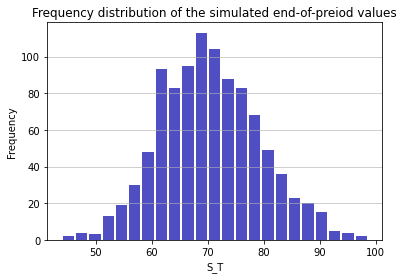

In [35]:
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [36]:
#PATH 2 - Black Scholes Model
def binary_option_bs(S, K, T, r, vol, payoff):
    #Assuming no dividend yield
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0) 
    elif payoff == "put":
        option_value = np.exp(-r * T) *(1 - si.norm.cdf(d2, 0.0, 1.0))
    
    return option_value

In [37]:
binary_option_bs(70.786301, 71, 4/52, 0.0174, 0.454273765, 'put')

0.5296995975552252

In [38]:
#Greeks 1- Delta
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))

    if payoff == "call":
        delta = np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) / (vol * S * np.sqrt(T))
    elif payoff == "put":
        delta = np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return delta

In [39]:
delta(70.786301, 71, 4/52, 0.0174, 0, 0.454273765, 'put')

0.04454197581123321

In [40]:
S = np.linspace(10,100,10)
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Put [i] = delta(S[i] , 71, 4/52, 0.0174, 0, 0.454273765, 'put')

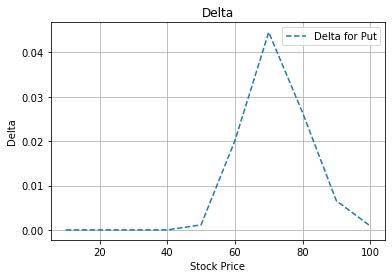

In [41]:
fig = plt.figure()
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Put'])

In [42]:
#Greeks 2- Gamma
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    
    if payoff == "call": 
        gamma = - (np.exp(-r * T) * d1 / (vol * np.sqrt(T)) * si.norm.pdf(d2, 0.0, 1.0) / ((vol ** 2) * (S ** 2) * np.sqrt(T)))
    
    elif payoff == "put": 
        gamma = (np.exp(-r * T) * d1 / (vol * np.sqrt(T)) * si.norm.pdf(d2, 0.0, 1.0) / ((vol ** 2) * (S ** 2) * np.sqrt(T)))
    
    return gamma

In [43]:
gamma(70.786301, 71, 4/52, 0.0174, 0, 0.454273765, 'put')

0.0005463448080727739

In [44]:
S = np.linspace(10,100,10)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 71, 4/52, 0.0174, 0, 0.454273765, 'put')

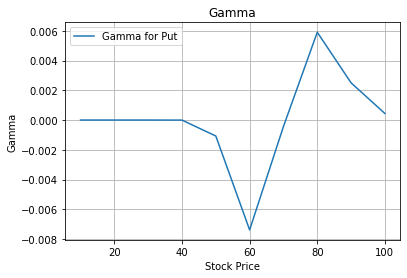

In [45]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Put'])

In [46]:
#Greeks 3-Theta
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    A = d1 / (2 * T)
    B = r-q / vol * np.sqrt(T)
    
    if payoff == "call":
        theta = (r * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0) + np.exp(-r * T) * si.norm.pdf( d2, 0.0, 1.0) * (A - B)) * -1
    
    elif payoff == "put":
        theta = (r * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0) - np.exp(-r * T) * si.norm.pdf( d2, 0.0, 1.0) * (A - B)) * -1
    
    return theta

In [47]:
theta(70.786301, 71, 4/52, 0.0174, 0, 0.454273765, 'put') 

0.11324607607774853

In [48]:
T = np.linspace(0.25,3,12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Put [i] = theta(70.786301, 71, T[i], 0.0174, 0, 0.454273765, 'put')

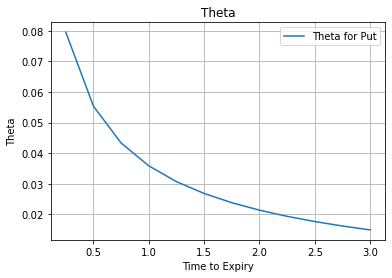

In [49]:
fig = plt.figure()
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Put'])

In [50]:
#Greeks 4-Vega
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
      vega = - np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) * (np.sqrt (T) + si.norm.pdf(d2, 0.0, 1.0) / vol )   
    elif payoff== "put":
      vega = np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) * (np.sqrt (T) + si.norm.pdf(d2, 0.0, 1.0) / vol )
    
    return vega

In [51]:
vega(70.786301, 71, 4/52, 0.0174, 0, 0.454273765, 'put')

0.458028303114723

In [52]:
vol = np.linspace(0.1,0.4,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(70.786301, 71, 4/52, 0.0174, 0.454273765, vol[i] , 'put')

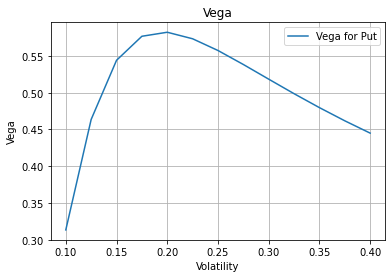

In [53]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Put'])

In [54]:
#Greeks 5- Rho
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  -T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0) + (np.sqrt(T) / vol) * np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho =  -T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0) - (np.sqrt(T) / vol) * np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)
    
    return rho

In [55]:
rho(70.786301, 71, 4/52, 0.0174, 0, 0.454273765, 'put')

-0.2786095802427021

In [56]:
r = np.linspace(0,0.1,11)
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Put [i] = rho(100, 100, 1, r[i], 0.03, 0.25, 'put')

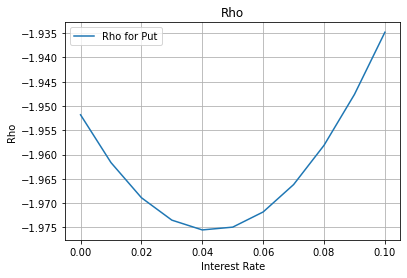

In [57]:
fig = plt.figure()
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Put'])